In [1]:
import subprocess
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!poetry run ganji log >log.csv 2>/dev/null

In [3]:
csv = "log.csv"
data = pd.read_csv(csv, encoding = "UTF-8")
data

,epoch,g_loss,d_loss,d_acc
0,0,0.757312,0.687568,0.574219
1,1,0.902870,0.461879,0.733398
2,2,0.725198,0.360665,0.725098
3,3,0.772328,0.387021,0.738770
4,4,0.820350,0.365484,0.744141
...,...,...,...,...
64943,64943,13.398191,0.000071,1.000000
64944,64944,12.823531,0.000094,1.000000
64945,64945,12.647994,0.000083,1.000000
64946,64946,12.702555,0.000098,1.000000


In [4]:
epoch_end = 50000

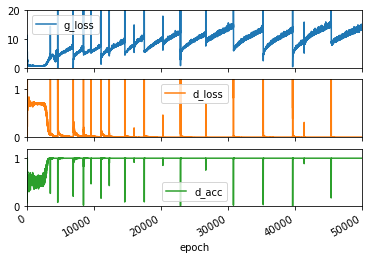

In [5]:
subplots = data.plot(x=data.columns[0], xlim=(0, epoch_end), subplots=True)
subplots[0].set_ylim((0, 20))
subplots[1].set_ylim((0, 1.2))
subplots[2].set_ylim((0, 1.2))
None

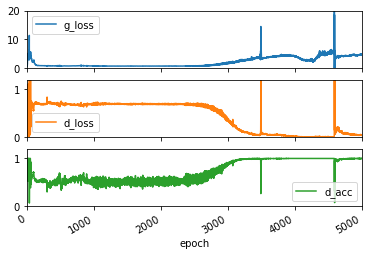

In [6]:
subplots = data.plot(x=data.columns[0], xlim=(0, 5000), subplots=True)
subplots[0].set_ylim((0, 20))
subplots[1].set_ylim((0, 1.2))
subplots[2].set_ylim((0, 1.2))
None

In [7]:
from PIL import Image, ImageFont, ImageDraw

font = ImageFont.truetype("/usr/share/fonts/TTF/JetBrainsMono-Bold.ttf", 12)

images = []
for epoch in range(0, epoch_end + 1, 10):
    image = Image.open(os.path.join("training", f"{epoch:06d}.png"))
    draw = ImageDraw.Draw(image)
    draw.text(
        (307, 1), f"epoch={epoch:06d}", font=font, align="right",
        fill="white", stroke_width=2, stroke_fill="black")
    images.append(image)

In [8]:
images[0].save('animation.gif', save_all=True, append_images=images[1:], optimize=True, duration=6, loop=0)

In [10]:
!ffmpeg -y -r 60 -i animation.gif -row-mt 1 -crf 30 -qmin 3 -qmax 40 -threads 4 -c:v libvpx-vp9 animation.webm

ffmpeg version n4.2.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avisynth --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --enable-nvenc --enable-omx --enable-shared --enable-version3
  libavutil      56. 31